In [36]:
import sys, os
sys.path.append(r"C:\Users\micha\OneDrive\Documents\code\pyfi\\")

from pyfi.base.retrievers import equity
from pyfi.analytics.time_series.stats.probability import Probability
from pyfi.analytics.time_series.stats.descriptive import Descriptive
from pyfi.core.underlying import Underlying
from pyfi.core.timeseries import TimeSeries, Frequency, AggFunc
from pyfi.core.underlying import Underlying
from pyfi.base.retrievers import options
from pyfi.core.options.options import Chain, Contract, OptionType, OptionExposure


import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#https://arch.readthedocs.io/en/latest/univariate/forecasting.html

In [2]:
TICKER = 'VTWO'
START_DATE = '2023-09-01'
TARGET_EXP_DATE = '2023-12-31'


In [3]:
asset = Underlying(ticker = TICKER, start_date=START_DATE, end_date=None)

In [4]:
asset.spot

79.66000366210938

Volatility Skew

In [24]:
all_calls, all_puts = options.concat_option_chain(TICKER)

C:\Users\micha\AppData\Local\Temp\ipykernel_26244\2530389065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['Implied Volatility'] = pd.to_numeric(res['Implied Volatility'].str.replace('%', ''))


<Axes: xlabel='Strike', ylabel='Implied Volatility'>

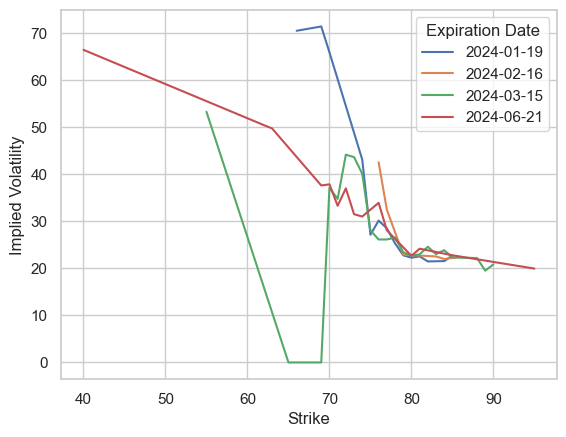

In [35]:
res = all_calls[['Strike', 'Expiration Date', 'Implied Volatility']]
res['Implied Volatility'] = pd.to_numeric(res['Implied Volatility'].str.replace('%', ''))

sns.lineplot(data=res, x='Strike', y='Implied Volatility', hue = 'Expiration Date')

Chain

In [ ]:
calls, puts = options.get_option_chain(ticker = TICKER, date = TARGET_EXP_DATE, strike_bounds=0.05)

In [7]:
all_calls.head()
# volatility_skew

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,Expiration Date,Expiration_dt,Market_IV
0,VTWO240119C00066000,2023-11-28 11:36AM EST,66.0,7.65,11.6,15.2,0.0,-,-,1,70.56%,2024-01-19,2024-01-19,0.7056
1,VTWO240119C00069000,2023-12-04 9:47AM EST,69.0,6.81,9.0,13.0,0.0,-,1,0,71.48%,2024-01-19,2024-01-19,0.7148
2,VTWO240119C00070000,2023-12-11 12:28PM EST,70.0,5.88,8.5,11.9,0.0,-,-,1,65.97%,2024-01-19,2024-01-19,0.6597
3,VTWO240119C00074000,2023-11-17 1:04PM EST,74.0,1.45,4.7,7.4,0.0,-,1,1,43.16%,2024-01-19,2024-01-19,0.4316
4,VTWO240119C00075000,2023-12-18 12:57PM EST,75.0,5.20,4.7,5.5,-0.4,-7.14%,12,30,27.17%,2024-01-19,2024-01-19,0.2717


In [23]:
optc = Chain(ticker = TICKER, chain = puts, option_type = OptionType.PUT, option_exposure = OptionExposure.LONG, spot = None)

optc.processed_chain

,VTWO240119P00072000,VTWO240119P00073000,VTWO240119P00074000,VTWO240119P00075000,VTWO240119P00076000,VTWO240119P00077000,VTWO240119P00078000,VTWO240119P00079000,VTWO240119P00080000,VTWO240119P00081000
Last Trade Date,2023-12-12 12:48PM EST,2023-12-04 11:58AM EST,2023-12-14 2:15PM EST,2023-12-18 2:30PM EST,2023-12-15 3:19PM EST,2023-12-18 10:28AM EST,2023-12-15 2:10PM EST,2023-12-18 2:08PM EST,2023-12-18 2:07PM EST,2023-12-15 10:37AM EST
Strike,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0
Last Price,0.35,1.07,0.5,0.41,0.55,0.75,1.25,1.52,1.95,2.24
Bid,0.0,0.05,0.05,0.15,0.5,0.5,0.65,1.05,1.6,1.85
Ask,0.85,0.5,0.4,0.4,0.8,1.1,1.4,2.35,2.8,3.2
Change,0.0,0.0,0.0,-0.02,0.0,0.69,0.0,0.28,0.28,0.0
% Change,-,-,-,-4.65%,-,"+1,150.00%",-,+22.58%,+16.77%,-
Volume,1,100,5,296,6,1,6,8,1,1
Open Interest,6,102,7,93,6,1,4,5,8,1
Implied Volatility,37.96%,28.57%,23.63%,20.66%,23.54%,23.63%,22.97%,28.61%,28.03%,26.25%


In [9]:
from pyfi.core.options.strategies.vertical_put_spread import VerticalPutSpread
from pyfi.base.retrievers import options
from pyfi.core.options.options import Chain, Contract, OptionType, OptionExposure
import QuantLib as ql
from datetime import datetime
today = datetime.today()

leg_long = Contract(ticker='TLT', option_type = OptionType.PUT, option_exposure = OptionExposure.SHORT,
                valuation=ql.Date(today.day, today.month, today.year), expiration=ql.Date(22, 12, 2023), 
                premium=4, spot=None, K=90.5, ivol=None) 

leg_short = Contract(ticker='TLT', option_type = OptionType.PUT, option_exposure = OptionExposure.LONG,
                valuation=ql.Date(today.day, today.month, today.year), expiration=ql.Date(22, 12, 2023), 
                premium=2, spot=None, K=85.5, ivol=None) 

vps = VerticalPutSpread(clsLong=leg_long, clsShort=leg_short)
# vps.plot()
print('max profit:', vps.max_profit)
print('max loss:', vps.max_loss)
print('pl ratio:', vps.pl_ratio,  'pl odds', f"{1/vps.pl_ratio}:1")


max profit: 200
max loss: 300.0
pl ratio: 0.6666666666666666 pl odds 1.5:1


Garch

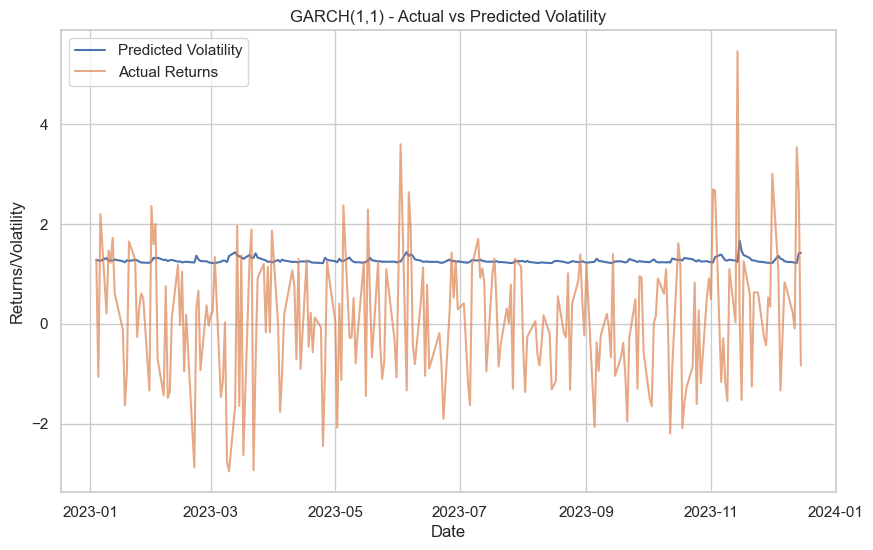

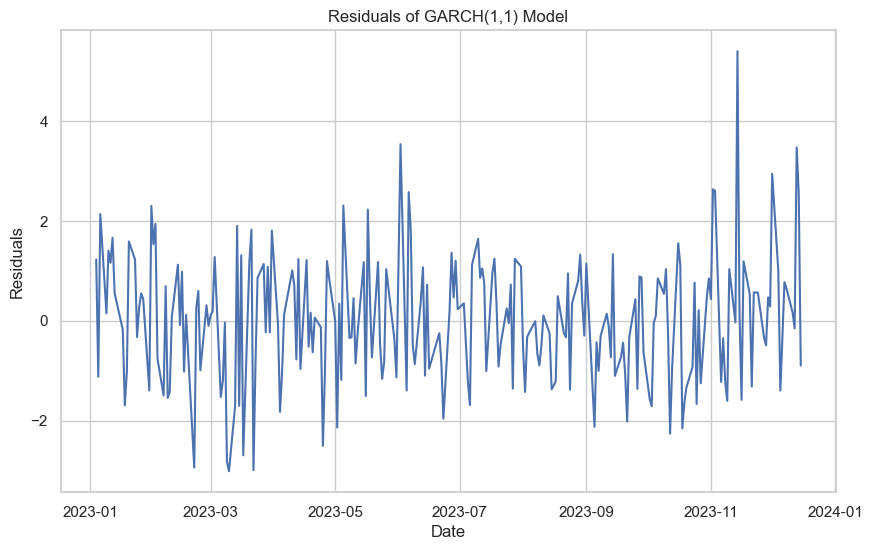

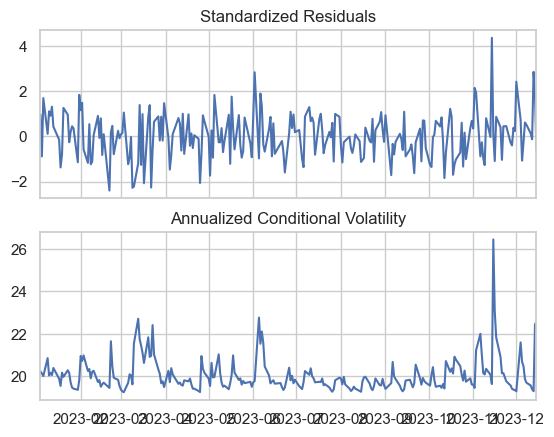

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -396.719
Distribution:                  Normal   AIC:                           801.437
Method:            Maximum Likelihood   BIC:                           815.360
                                        No. Observations:                  240
Date:                Mon, Dec 18 2023   Df Residuals:                      239
Time:                        23:59:32   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0583  8.264e-02      0.706      0.480 [ -0.104,  0.22

In [10]:
asset.fit_garch(plot=True)

Technicals

In [11]:
# asset.plot_garch()
asset.add_bollinger_bands()
asset.add_rsi()
asset.add_macd()
asset.add_on_balance_volume()
asset.df

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli,rsi,rsi_d,rsi_k,macd,macd_dif,macd_signal,obv
Date,,,,,,,,,,,,,,,,,,
2023-01-03,71.029999,71.550003,69.389999,69.959999,69.213257,1675100,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1675100
2023-01-04,70.480003,71.300003,70.339996,70.860001,70.103645,1539700,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3214800
2023-01-05,70.480003,70.510002,69.580002,70.110001,69.361649,1176100,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2038700
2023-01-06,70.760002,71.839996,70.169998,71.650002,70.885216,1193900,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3232600
2023-01-09,72.260002,72.680000,71.709999,71.800003,71.033615,1024000,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4256600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-11,75.480003,75.820000,75.169998,75.680000,75.680000,2164900,72.969500,76.538756,69.400245,0.0,0.0,0.774058,0.599113,0.699211,1.466570,0.258575,1.207995,21887300
2023-12-12,75.580002,75.870003,74.970001,75.610001,75.610001,2481900,73.330000,76.402154,70.257846,0.0,0.0,0.727351,0.675557,0.743831,1.480162,0.217733,1.262429,19405400
2023-12-13,75.660004,78.300003,75.089996,78.279999,78.279999,6152800,73.637500,77.335121,69.939880,1.0,0.0,1.000000,0.758948,0.833803,1.686934,0.339604,1.347330,25558200


Probability

In [12]:
rets = asset.price_ts.pct_change().dropna().multiply(100)

prob = Probability(df = rets)

In [13]:
prob.scenario_probabilites()

P(x),-5.0,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,...,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
Close,0.0,0.0002,0.0007,0.0025,0.0079,0.0217,0.052,0.109,0.2012,0.3288,...,0.365,0.2298,0.1285,0.0633,0.0273,0.0103,0.0034,0.001,0.0002,0.0


In [14]:
prob.scenario_z_scores()

Z-score,-5.0,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,...,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
0,-3.9911,-3.5969,-3.2027,-2.8085,-2.4143,-2.02,-1.6258,-1.2316,-0.8374,-0.4432,...,0.3453,0.7395,1.1337,1.5279,1.9221,2.3163,2.7105,3.1048,3.499,3.8932


In [15]:
Descriptive(df=rets).describe()

,Close,0
0.1,-1.464205,NaN
0.25,-0.897609,NaN
0.5,0.040106,NaN
0.75,0.932842,NaN
0.9,1.395447,NaN
mean,NaN,0.062100
median,NaN,0.040106
std,NaN,1.268342
var,NaN,1.608692
skew,NaN,0.355898


In [16]:
ts = TimeSeries(
    df = rets,
)

In [17]:
ts.group(frequency = Frequency.WEEKLY_F, aggfunc=np.sum)

In [18]:
Descriptive(df=ts.df).describe()

,Close,0
0.1,-3.218678,NaN
0.25,-1.957517,NaN
0.5,0.397758,NaN
0.75,2.340663,NaN
0.9,3.868751,NaN
mean,NaN,0.298078
median,NaN,0.397758
std,NaN,3.036178
var,NaN,9.218376
skew,NaN,-0.069155


Simulation

In [19]:

from pyfi.analytics.time_series.stats.montecarlo import MonteCarlo

mc = MonteCarlo(prices = asset.price_ts, num_simulations = 1000, n_periods = 30)
simulated, full_simulation = mc.run()
# # mc.plot()

In [20]:
mc.describe()

,Simulation End Values
0.1,72.826686
0.25,75.791946
0.5,79.291771
0.75,82.967465
0.9,86.933847
mean,79.496634
median,79.291771
std,5.273203
var,27.806669
skew,0.103130
